In [41]:
import folium
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('london_crime_by_lsoa.csv')

In [43]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [44]:
df.shape

(13490604, 7)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [46]:
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [47]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [48]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [49]:
#add date
from pandas.tseries.offsets import MonthEnd
df["yearmonth"] = df["year"].astype(str) + df["month"].astype(str)
df['EndOfMonth'] = pd.to_datetime(df['yearmonth'], format="%Y%m") + MonthEnd(1)

# Perkembangan kriminalitas di London berdasarkan tahun

In [50]:
df2=df.groupby('year', as_index=True).agg({"value":"sum"})

In [51]:
df2

,value
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [52]:
df2.index.values

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype=int64)

Text(0.5, 0, 'Tahun')

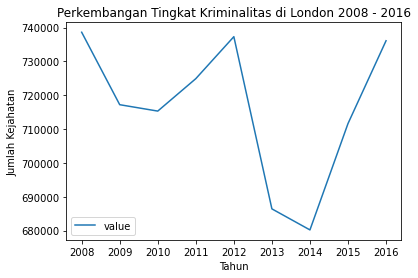

In [53]:
df2.index = df2.index.map(int)
df2.plot(kind='line')

plt.title('Perkembangan Tingkat Kriminalitas di London 2008 - 2016')
plt.ylabel('Jumlah Kejahatan')
plt.xlabel('Tahun')

# Kriminalitas di Wilayah London selama 2008 - 2016

In [54]:
df3=df.groupby('borough', as_index=False).agg({"value":"sum"}).sort_values(by=['value'],ascending=[False])

In [55]:
df3['borough']

32               Westminster
21                   Lambeth
27                 Southwark
5                     Camden
24                    Newham
7                    Croydon
8                     Ealing
18                 Islington
29             Tower Hamlets
3                      Brent
11                   Hackney
22                  Lewisham
13                  Haringey
1                     Barnet
16                Hillingdon
31                Wandsworth
30            Waltham Forest
9                    Enfield
17                  Hounslow
12    Hammersmith and Fulham
4                    Bromley
25                 Redbridge
10                 Greenwich
19    Kensington and Chelsea
0       Barking and Dagenham
15                  Havering
14                    Harrow
23                    Merton
2                     Bexley
28                    Sutton
26      Richmond upon Thames
20      Kingston upon Thames
6             City of London
Name: borough, dtype: object

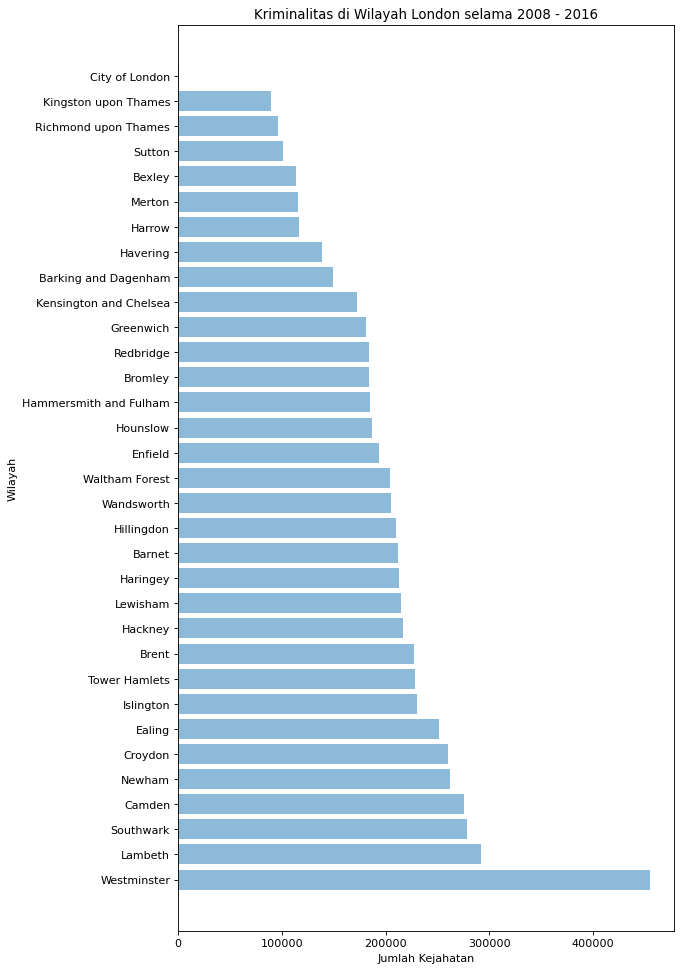

In [56]:
from matplotlib.pyplot import figure
figure(figsize=(8, 15), dpi=80)
plt.barh(df3['borough'], df3['value'], align='center', alpha=0.5)
plt.title('Kriminalitas di Wilayah London selama 2008 - 2016')
plt.ylabel('Wilayah')
plt.xlabel('Jumlah Kejahatan')
plt.show()

# Perkembangan Kejahatan di 5 Wilayah Terbanyak

In [57]:
df4 = pd.pivot_table(df, values='value', index=['borough'],columns=['year'], aggfunc=np.sum)

In [58]:
df4['Total']=df4.sum(axis=1) #add total
df4

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
City of London,0,0,0,69,157,110,115,151,178,780
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712,260294
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127,251562


In [59]:
df4.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df5 = df4.head(5) #ambil 5 wilayah tertinggi
df5

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


In [60]:
df5.drop('Total', axis=1, inplace=True) #drop Total
df5

C:\Users\sarah\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090


In [61]:
df5=df5.transpose() #transpose

In [62]:
df5

borough,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


In [63]:
df5.index=df5.index.map(int)

Text(0.5, 1.0, 'Perkembangan Kejahatan di 5 Wilayah Terbanyak')

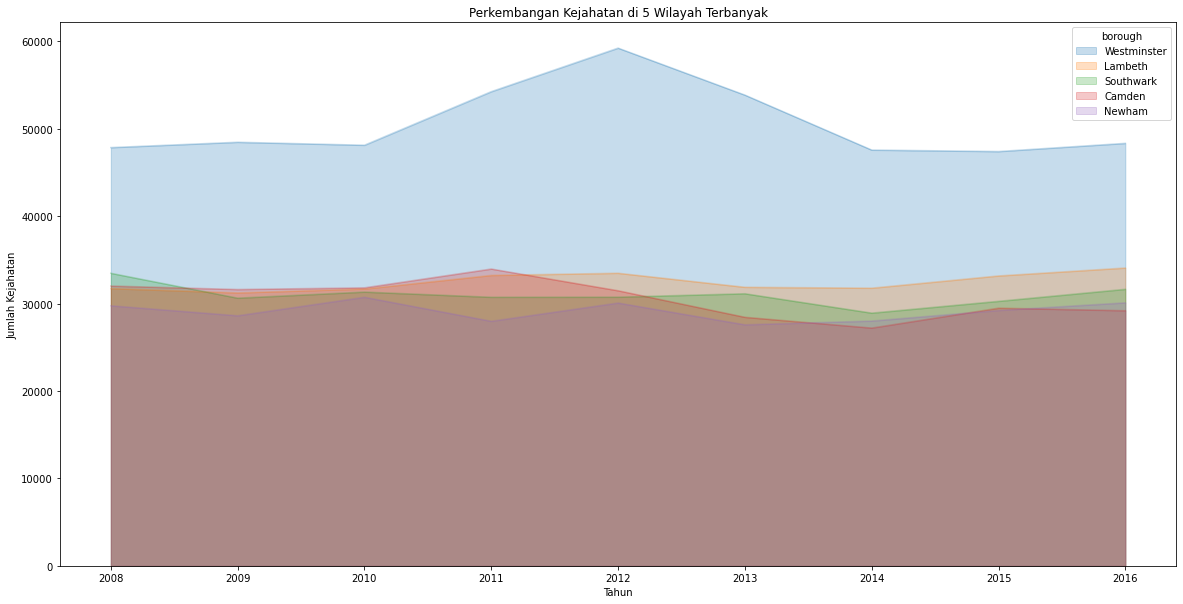

In [64]:
df5.plot(kind='area',
         alpha=0.25,
         stacked=False,
         figsize=(20,10))
plt.ylabel('Jumlah Kejahatan')
plt.xlabel('Tahun')
plt.title('Perkembangan Kejahatan di 5 Wilayah Terbanyak')

# Histogram

In [65]:
df4[2016].head()

borough
Westminster    48330
Lambeth        34071
Southwark      31636
Camden         29183
Newham         30090
Name: 2016, dtype: int64

In [66]:
count, bin_edges=np.histogram(df4[2016])
print(count)
print(bin_edges)

[ 1  0  6  2 10  8  4  1  0  1]
[  178.   4993.2  9808.4 14623.6 19438.8 24254.  29069.2 33884.4 38699.6
 43514.8 48330. ]


Text(0.5, 1.0, 'Histogram')

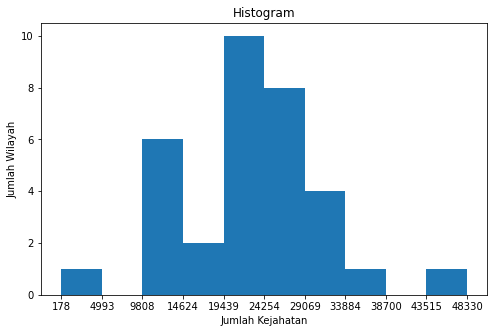

In [67]:
df4[2016].plot(kind='hist',figsize=(8,5), xticks=bin_edges)
plt.ylabel('Jumlah Wilayah')
plt.xlabel('Jumlah Kejahatan')
plt.title('Histogram')

# Pie Chart

In [68]:
df5=df.groupby('major_category', as_index=True).agg({"value":"sum"}).sort_values(by=['value'],ascending=[False])

(-1.1231601551367114,
 1.1088943210782847,
 -1.1330414213370075,
 1.1015734010179887)

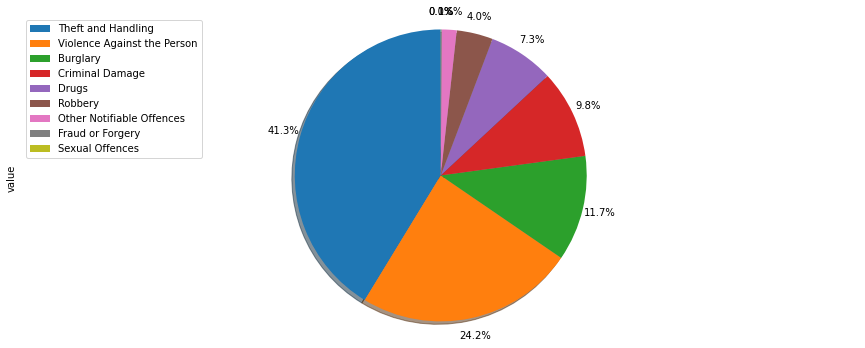

In [69]:
df5.plot.pie(y='value', 
                    figsize=(15,6),
                   autopct='%1.1f%%',
                   startangle=90,
                   shadow=True,
                   labels=None,
                   pctdistance=1.12)
plt.legend(labels=df5.index, loc='upper left')
plt.axis('equal')

# box plot

In [70]:
df6 = df4.loc[['Westminster']].transpose()
df6 = df6.drop(['Total'])

<AxesSubplot:>

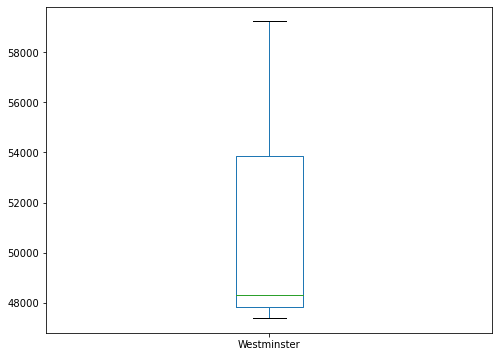

In [71]:
df6.plot(kind='box', figsize=(8,6))

# scatter plot

In [72]:
df7 = pd.DataFrame(df4.sum(axis=0))
df7

,0
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [73]:
df7=df7.drop(['Total'])
df7

,0
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [74]:
df7=df7.rename(columns={0:'Total'})
df7

,Total
year,
2008,738641
2009,717214
2010,715324
2011,724915
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [75]:
df7.reset_index(inplace=True)

In [76]:
df7

,year,Total
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


Text(0, 0.5, 'Total Kejahatan')

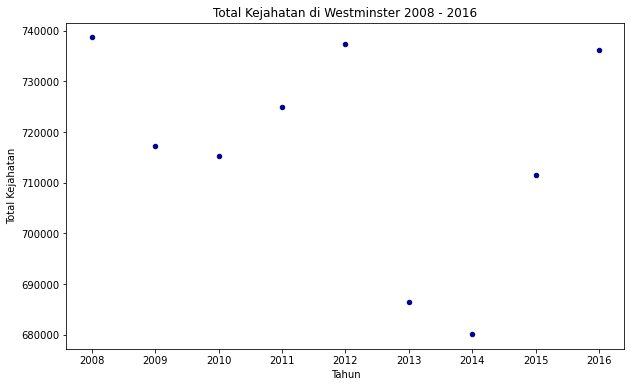

In [77]:
df7.plot(kind='scatter',
        x='year',
        y='Total',
        figsize=(10,6),
        color='darkblue')

plt.title('Total Kejahatan di Westminster 2008 - 2016')
plt.xlabel('Tahun')
plt.ylabel('Total Kejahatan')

# Folium

In [78]:
import folium

In [79]:
london_geo = r'london_borough.geojson'

In [80]:
world_map = folium.Map(location=[51.507822097714055, -0.12786449729312158], zoom_start=9)

In [81]:
folium.Choropleth(geo_data=london_geo,
                 data=df4,
                 columns=[df4.index, 'Total'],
                 key_on='feature.properties.name',
                 fill_color='YlOrRd',
                 fill_opacity=0.7,
                 line_opacity=0.2,
                 legend_name='Kriminalitas di London').add_to(world_map)
world_map

# Word Clouds

In [76]:
# install wordcloud
# !conda install -c conda-forge wordcloud --yes

!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [81]:
f = open('london_borough.geojson', "r")
print(f.read())

{"type":"FeatureCollection","features":[{"type":"Feature","properties":{"name":"Barking and Dagenham","color":"blue"},"geometry":{"type":"Polygon","coordinates":[[[0.1885882,51.5538749],[0.1883107494386028,51.554023919399114],[0.1883052,51.5540269],[0.1881102,51.5540519],[0.1879652,51.55409900000001],[0.18790820000000003,51.554176],[0.18796320000000002,51.554243],[0.18806220000000004,51.55427900000001],[0.18812019999999996,51.554375],[0.18803619999999996,51.554446],[0.1878722,51.554473],[0.1876942,51.554477],[0.18761319999999998,51.554547],[0.1875692,51.554662],[0.18763520000000003,51.554738],[0.1877402,51.55479499999999],[0.18778820000000002,51.554871000000006],[0.1876902,51.555053],[0.18765520000000002,51.55515],[0.1875422,51.555245],[0.18744919999999998,51.55537],[0.18725819999999999,51.555502999999995],[0.1870832,51.555566],[0.18704120000000002,51.555647],[0.18702519999999997,51.555763],[0.18697219999999998,51.555803],[0.1869102,51.555842],[0.1867604,51.5558685],[0.1865362,51.55590

In [82]:
stopwords = set (STOPWORDS)

In [83]:
london_wc = WordCloud (
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

london_borough = open('london_borough.geojson', 'r').read()

london_wc.generate(london_borough)

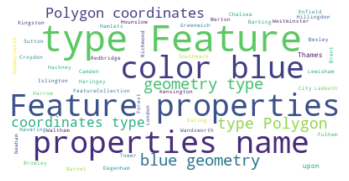

In [84]:
plt.imshow(london_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

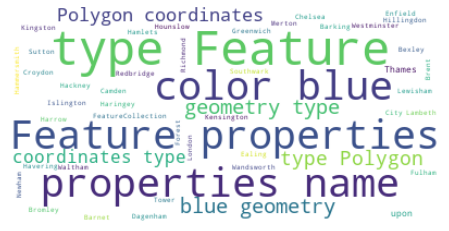

In [85]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figwidth(18)

plt.imshow(london_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

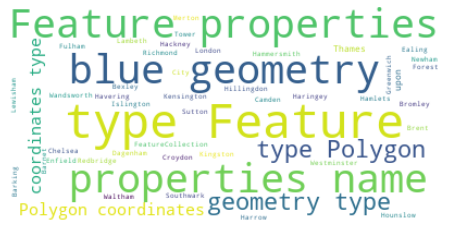

In [86]:
stopwords.add('color')

london_wc.generate(london_borough)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figwidth(18)

plt.imshow(london_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Kesimpulan

1. Jumlah kriminalitas tertinggi di London terjadi pada tahun 2008
2. Lokasi kriminalitas tertinggi selama tahun 2008-2016 terjadi di Westminster
3. Lima wilayah terbanyak kasus kejahatan selama tahun 2018-2016 terjadi di Westminster, Lambeth, Southwark, Camden, dan Newham
4. Kejahatan terbanyak yang terjadi yaitu pencurian
5. Kata-kata terbanyak yang muncul yaitu Feature